# SVM

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving games.csv to games.csv


# Importación de datos

In [ ]:
import pandas as pd
 
data = pd.read_csv('games.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
# Información de la db

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
print(data['gameId'].count())

9879


## **Limpieza de datos**

In [ ]:
df = data[data['blueWardsPlaced'] <= 100 ]
df = df[df['blueTotalMinionsKilled'] > 90 ]

In [ ]:
print(df['gameId'].count())

9770


## **Definir features (inputs) y la variable target (crítica/label)**

In [ ]:
features = ['blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueKills']
X = df[features]
Y = df['blueWins']

In [ ]:
print(X)

      blueTowersDestroyed  blueTotalMinionsKilled  blueKills
0                       0                     195          9
1                       0                     174          5
2                       0                     186          7
3                       0                     201          4
4                       0                     210          6
...                   ...                     ...        ...
9874                    0                     211          7
9875                    0                     233          6
9876                    0                     210          6
9877                    0                     224          2
9878                    0                     207          6

[9770 rows x 3 columns]


In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9770, dtype: int64


# Creación de Modelo

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

## 80% -20%

In [ ]:
# Sets de 80% entrenamiento y 20% testeo 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)  

### SVM Simple

Kernel lineal

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="linear")
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.6883316274309109 =  68.83 % 

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       982
           1       0.69      0.67      0.68       972

    accuracy                           0.69      1954
   macro avg       0.69      0.69      0.69      1954
weighted avg       0.69      0.69      0.69      1954

Mean Absolute Error: 0.31167
Mean Squared Error: 0.31167
Root Mean Squared Error: 0.55827


#### Matriz de confusión

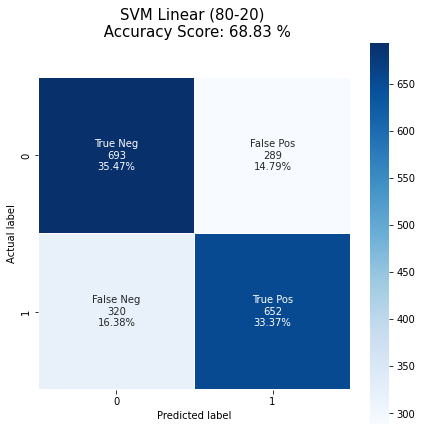

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Linear (80-20) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);

#### Gráfica

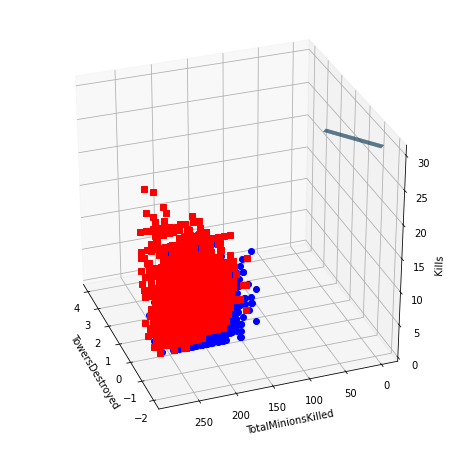

In [ ]:
x_graph = x_train.to_numpy()
y_graph = y_train.to_numpy()

svc = svclassifier

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(projection='3d')
ax.plot3D(x_graph[y_graph==0,0], x_graph[y_graph==0,1], x_graph[y_graph==0,2],'ob')
ax.plot3D(x_graph[y_graph==1,0], x_graph[y_graph==1,1], x_graph[y_graph==1,2],'sr')
ax.plot_surface(x, y, z(x,y))

ax.set_xlabel('TowersDestroyed')
ax.set_ylabel('TotalMinionsKilled')
ax.set_zlabel('Kills')

ax.view_init(30, -560)

plt.show()

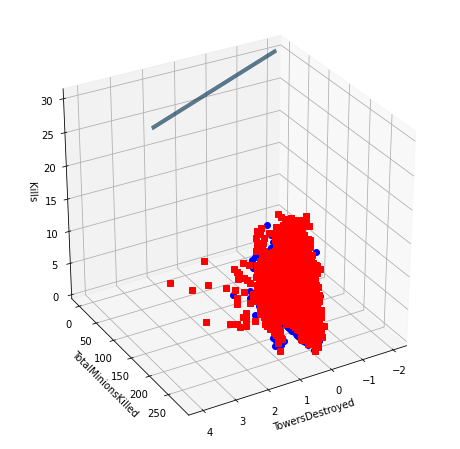

In [ ]:
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(projection='3d')
ax.plot3D(x_graph[y_graph==0,0], x_graph[y_graph==0,1], x_graph[y_graph==0,2],'ob')
ax.plot3D(x_graph[y_graph==1,0], x_graph[y_graph==1,1], x_graph[y_graph==1,2],'sr')
ax.plot_surface(x, y, z(x,y))

ax.set_xlabel('TowersDestroyed')
ax.set_ylabel('TotalMinionsKilled')
ax.set_zlabel('Kills')

ax.view_init(30, 60)
plt.show()

### SVM Kernel polinomial

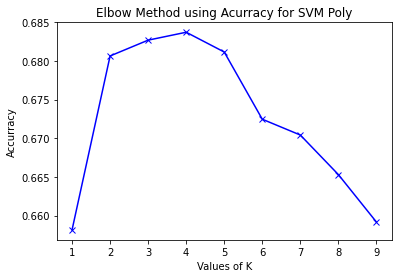

In [ ]:
accuracies = []

K = range(1, 10)

for k in K:
  svclassifier = SVC(kernel="poly", degree = k).fit(x_train, y_train)
  y_pred = svclassifier.predict(x_test)
  score = svclassifier.score(x_test, y_test)
  accuracies.append(score)

plt.plot(K, accuracies, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Accurracy')
plt.title('Elbow Method using Acurracy for SVM Poly')
plt.show()

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="poly", degree = 4)
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.6837256908904811 =  68.37 % 

              precision    recall  f1-score   support

           0       0.66      0.75      0.71       982
           1       0.71      0.61      0.66       972

    accuracy                           0.68      1954
   macro avg       0.69      0.68      0.68      1954
weighted avg       0.69      0.68      0.68      1954

Mean Absolute Error: 0.31627
Mean Squared Error: 0.31627
Root Mean Squared Error: 0.56238


#### Matriz de confusión

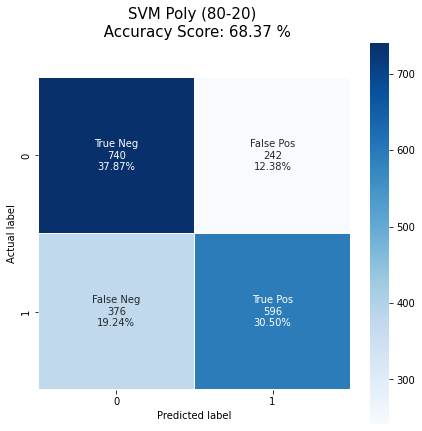

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Poly (80-20) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);

### SVM Kernel Gausiano

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="rbf")
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.6770726714431935 =  67.71 % 

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       982
           1       0.68      0.66      0.67       972

    accuracy                           0.68      1954
   macro avg       0.68      0.68      0.68      1954
weighted avg       0.68      0.68      0.68      1954

Mean Absolute Error: 0.32293
Mean Squared Error: 0.32293
Root Mean Squared Error: 0.56827


#### Matriz de confusión

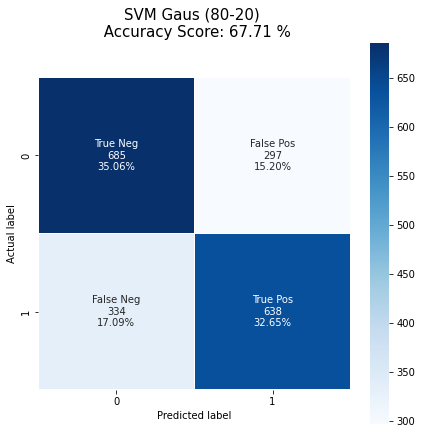

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Gaus (80-20) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);

### SVM Kernel Sigmoideo

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="sigmoid")
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.41146366427840325 =  41.15 % 

              precision    recall  f1-score   support

           0       0.41      0.40      0.41       982
           1       0.41      0.42      0.42       972

    accuracy                           0.41      1954
   macro avg       0.41      0.41      0.41      1954
weighted avg       0.41      0.41      0.41      1954

Mean Absolute Error: 0.58854
Mean Squared Error: 0.58854
Root Mean Squared Error: 0.76716


##### Matriz de confusión

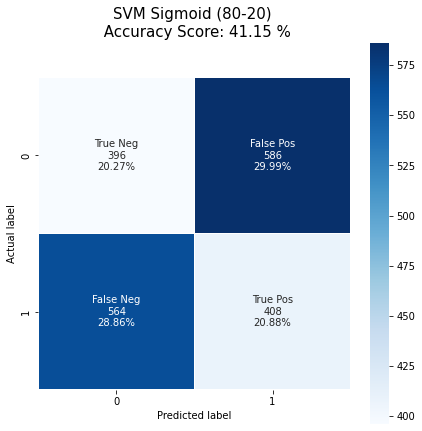

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Sigmoid (80-20) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);

## 66% - 33%

In [ ]:
# Sets de 2/3 (66%) entrenamiento y 1/3 (33%) testeo
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=4)  

#### SVM Simple

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="linear")
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.6822229045133559 =  68.22 % 

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1667
           1       0.68      0.67      0.67      1590

    accuracy                           0.68      3257
   macro avg       0.68      0.68      0.68      3257
weighted avg       0.68      0.68      0.68      3257

Mean Absolute Error: 0.31778
Mean Squared Error: 0.31778
Root Mean Squared Error: 0.56372


##### Matriz de confusión

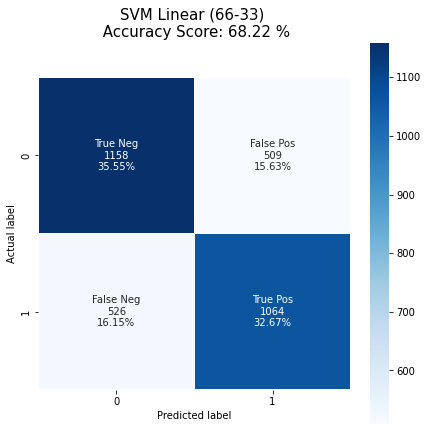

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Linear (66-33) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);

##### Gráfica

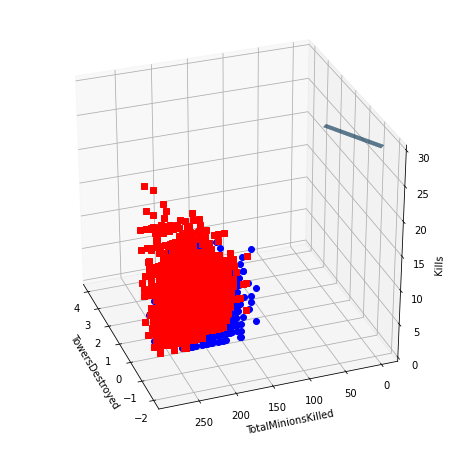

In [ ]:
x_graph = x_train.to_numpy()
y_graph = y_train.to_numpy()

svc = svclassifier

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(projection='3d')
ax.plot3D(x_graph[y_graph==0,0], x_graph[y_graph==0,1], x_graph[y_graph==0,2],'ob')
ax.plot3D(x_graph[y_graph==1,0], x_graph[y_graph==1,1], x_graph[y_graph==1,2],'sr')
ax.plot_surface(x, y, z(x,y))

ax.set_xlabel('TowersDestroyed')
ax.set_ylabel('TotalMinionsKilled')
ax.set_zlabel('Kills')

ax.view_init(30, -560)

plt.show()

#### SVM Kernel polinomial

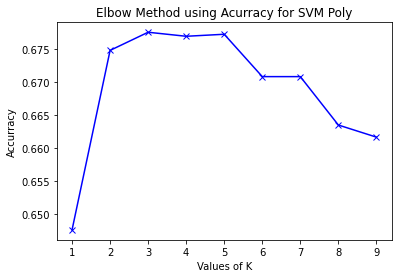

In [ ]:
accuracies = []

K = range(1, 10)

for k in K:
  svclassifier = SVC(kernel="poly", degree = k).fit(x_train, y_train)
  y_pred = svclassifier.predict(x_test)
  score = svclassifier.score(x_test, y_test)
  accuracies.append(score)

plt.plot(K, accuracies, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Accurracy')
plt.title('Elbow Method using Acurracy for SVM Poly')
plt.show()

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="poly", degree = 3)
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.6776174393613755 =  67.76 % 

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1667
           1       0.69      0.62      0.65      1590

    accuracy                           0.68      3257
   macro avg       0.68      0.68      0.68      3257
weighted avg       0.68      0.68      0.68      3257

Mean Absolute Error: 0.32238
Mean Squared Error: 0.32238
Root Mean Squared Error: 0.56779


##### Matriz

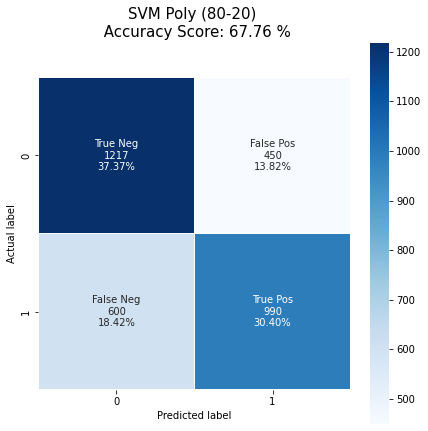

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Poly (80-20) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);

#### SVM Kernel Gausiano

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="rbf")
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.6656432299662266 =  66.56 % 

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1667
           1       0.66      0.65      0.66      1590

    accuracy                           0.67      3257
   macro avg       0.67      0.67      0.67      3257
weighted avg       0.67      0.67      0.67      3257

Mean Absolute Error: 0.33436
Mean Squared Error: 0.33436
Root Mean Squared Error: 0.57824


##### Matriz

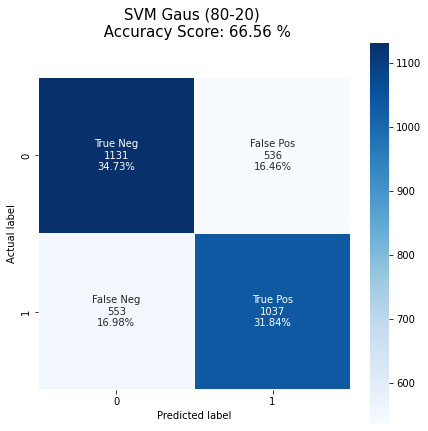

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Gaus (80-20) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);

#### SVM Kernel Sigmoideo

In [ ]:
# Ajustar el modelo
svclassifier = SVC(kernel="sigmoid")
svclassifier.fit(x_train, y_train)

# Realizar predicciones con set de entrenamiento
y_pred = svclassifier.predict(x_test)

# Hacer pruebas y validaciones
score = svclassifier.score(x_test, y_test)
print('\nAcurracy: ', score, '= ', round(score * 100, 2),'% \n')

print(classification_report(y_test, y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.4117285845870433 =  41.17 % 

              precision    recall  f1-score   support

           0       0.42      0.39      0.40      1667
           1       0.40      0.44      0.42      1590

    accuracy                           0.41      3257
   macro avg       0.41      0.41      0.41      3257
weighted avg       0.41      0.41      0.41      3257

Mean Absolute Error: 0.58827
Mean Squared Error: 0.58827
Root Mean Squared Error: 0.76699


##### Matriz

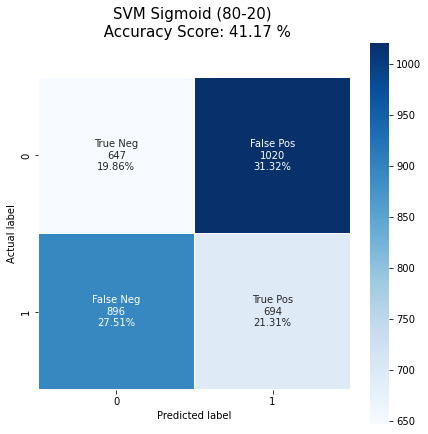

In [ ]:
# ---- Matriz de confusión ----
cm = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Sigmoid (80-20) \n Accuracy Score: {0} %\n\n'.format(round(score * 100, 2))
plt.title(all_sample_title, size = 15);